##  Откройте файл с данными и изучите общую информацию
##  Подготовьте данные
- Приведите данные к нужным типам;
+ Найдите и исправьте ошибки в данных, если они есть.
*Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
*Посчитайте для каждого пользователя:
*количество сделанных звонков и израсходованных минут разговора по месяцам;
*количество отправленных сообщений по месяцам;
*объем израсходованного интернет-трафика по месяцам;
*помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
##  Проанализируйте данные
*Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. *Постройте гистограммы. Опишите распределения.
##  Проверьте гипотезы
*средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
*средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
*Пороговое значение alpha задайте самостоятельно.
*Поясните:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

## Шаг 1. Откроем файлы с данными и изучим общую информацию

Импортируем библиотеки 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

Считываем данные

In [2]:
users = pd.read_csv('/datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<div style="border:solid green 2px; padding: 20px"> 
    
 1 **user_id** — уникальный идентификатор пользователя
 
 2 **first_name** — имя пользователя
 
 3 **last_name** — фамилия пользователя
  
 4 **age** — возраст пользователя (годы)
 
 5 **reg_date** — дата подключения тарифа (день, месяц, год)
 
 6 **churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
 
 7 **city** — город проживания пользователя
 
 8 **tarif** — название тарифного плана

In [3]:
calls = pd.read_csv('/datasets/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<div style="border:solid green 2px; padding: 10px"> 
    
 1 **id** — уникальный номер звонка
 
 2 **call_date** — дата звонка
 
 3 **duration** — длительность звонка в минутах
  
 4 **user_id** — идентификатор пользователя, сделавшего звонок
 

In [4]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<div style="border:solid green 2px; padding: 10px"> 
    
 1 **id** — уникальный номер звонка
 
 2 **message_date** — дата сообщения
  
 3 **user_id** — идентификатор пользователя, отправившего сообщение
 

In [5]:
internet = pd.read_csv('/datasets/internet.csv').drop(['Unnamed: 0'],axis = 1)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<div style="border:solid green 2px; padding: 10px"> 
    
 1 **id** — уникальный номер звонка
 
 2 **mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)
 
 3 **session_date** — дата интернет-сессии
  
 4 **user_id** — идентификатор пользователя


In [6]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div style="border:solid green 2px; padding: 20px"> 
    
 1 **tariff_name** — название тарифа
 
 2 **rub_monthly_fee** — ежемесячная абонентская плата в рублях
 
 3 **minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату
  
 4 **messages_included** — количество сообщений в месяц, включённых в абонентскую плату
 
 5 **mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 
 6 **rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
 
 7 **rub_per_message** — стоимость отправки сообщения сверх тарифного пакета
 
 8 **rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
    

---

## Шаг 2 Подготовка данных, предобработка, замена типа данных.

In [7]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')# меняем тип данных на to_datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")# меняем тип данных на to_datetime
users['month'] = users['reg_date'].dt.month #Создаём столбец с месяцем
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5
...,...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,8
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,1
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,10
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7


In [8]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")# меняем тип данных на to_datetime
calls['month'] = calls['call_date'].dt.month #Создаём столбец с месяцем
calls['duration'] = np.ceil(calls['duration'])
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12
202603,1499_216,2018-10-18,19.0,1499,10
202604,1499_217,2018-11-10,11.0,1499,11
202605,1499_218,2018-10-06,5.0,1499,10


In [9]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")# меняем тип данных на to_datetime
messages['month'] = messages['message_date'].dt.month #Создаём столбец с месяцем

In [10]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d") # меняем тип данных на to_datetime
internet['month'] =internet['session_date'].dt.month #Создаём столбец с месяцем

In [11]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})# Заменим имя для удобнобной группировки

In [12]:
#  Методом GROUPBY сгруппируем наши датасеты по ['user_id', 'month']
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'month_calls_duration','id':'calls_total_in_month'})
user_calls

,user_id,month,month_calls_duration,calls_total_in_month
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
...,...,...,...,...
3169,1498,10,247.0,41
3170,1499,9,70.0,9
3171,1499,10,449.0,68
3172,1499,11,612.0,74


In [13]:
#  Методом GROUPBY сгруппируем наши датасеты по ['user_id', 'month']
user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total_in_month'})
user_messages

,user_id,month,sms_total_in_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [14]:
#  Методом GROUPBY сгруппируем наши датасеты по ['user_id', 'month']
user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total_in_month'})

In [15]:
user_internet

,user_id,month,mb_total_in_month
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


**Объедини 3 таблицы в одну, также по user_id и month и с сохранением всех данных, с how=outer**

In [16]:
# Методом merge начинаем присоединять наши таблицы по['user_id','month']
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month
0,1000,5,159.0,22.0,22.0
1,1000,6,172.0,43.0,60.0
2,1000,7,340.0,47.0,75.0
3,1000,8,408.0,52.0,81.0
4,1000,9,466.0,58.0,57.0


In [17]:
# Методом merge начинаем присоединять наши таблицы по['user_id','month']
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month
0,1000,5,159.0,22.0,22.0,2253.49
1,1000,6,172.0,43.0,60.0,23233.77
2,1000,7,340.0,47.0,75.0,14003.64
3,1000,8,408.0,52.0,81.0,14055.93
4,1000,9,466.0,58.0,57.0,14568.91


In [18]:
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,month_x,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,month_y
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5


In [19]:
df = df.merge(tariffs, on='tariff', how='left')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
user_id                  3214 non-null int64
month_x                  3214 non-null int64
month_calls_duration     3174 non-null float64
calls_total_in_month     3174 non-null float64
sms_total_in_month       2717 non-null float64
mb_total_in_month        3203 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
month_y                  3214 non-null int64
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_m

In [20]:
# находим пропуски
df.isna().sum()

user_id                     0
month_x                     0
month_calls_duration       40
calls_total_in_month       40
sms_total_in_month        497
mb_total_in_month          11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
month_y                     0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [21]:
# Поставим 0: тем, которые не тратят интернет и не пишут смс
df['sms_total_in_month'] = df['sms_total_in_month'].fillna(0)
df['mb_total_in_month'] = df['mb_total_in_month'].fillna(0)
df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
df['calls_total_in_month'] = df['calls_total_in_month'].fillna(0)

In [22]:
# Создадим функция для подсчета по 3 критериям СМС,Мин,Мб
def above_the_tariff(row):
    sms = (row['sms_total_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
#     mbs = np.ceil((row['mb_total_in_month'] - row['mb_per_month_included']) * row['rub_per_gb']/ 1024)#Учитываем мб в гб
    mbs = np.ceil((row['mb_total_in_month'] - row['mb_per_month_included'])/ 1024) * row['rub_per_gb']
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [23]:
df.head()

,user_id,month_x,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,...,reg_date,tariff,month_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1


In [24]:
df['above_the_tariff'] = df.apply(lambda x: above_the_tariff(x), axis=1)# Добавим новый столбец который возьмёт значения функции
df['total_paid'] = df['rub_monthly_fee'] + df['above_the_tariff']# Добавим столбец оплату
df.sort_values(by='total_paid').head()

,user_id,month_x,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,...,month_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
2127,1340,1,25.0,5.0,0.0,2207.26,50,NaT,Пенза,Тимофей,...,1,50,15360,500,550,200,3,3,0.0,550.0
2982,1468,11,276.0,36.0,13.0,12737.04,29,NaT,Тамбов,Иван,...,2,50,15360,500,550,200,3,3,0.0,550.0
2318,1373,1,0.0,2.0,28.0,9173.74,34,NaT,Улан-Удэ,Нелли,...,1,50,15360,500,550,200,3,3,0.0,550.0
829,1134,2,458.0,59.0,47.0,13052.89,65,NaT,Красноярск,Марьяна,...,1,50,15360,500,550,200,3,3,0.0,550.0
1721,1275,12,364.0,61.0,17.0,14796.81,48,NaT,Москва,Семён,...,4,50,15360,500,550,200,3,3,0.0,550.0


---

## Шаг 3. Проанализируем данные

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем распределения.

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Плата Ультра')

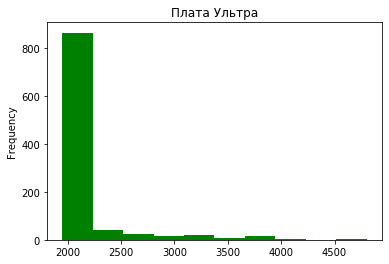

In [25]:
# Построим гистрораммы для визуализации оплаты по  тарифам
# Ультра
print(df[df['tariff'] == 'ultra']['total_paid'].plot(kind='hist', bins=10,color='green'))
plt.title('Плата Ультра')

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Плата Смарт')

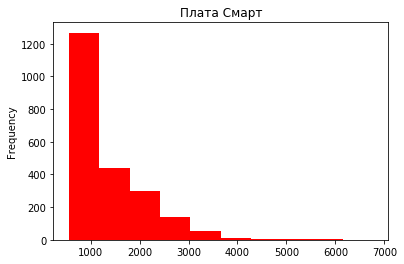

In [26]:
# Смарт
print(df[df['tariff'] == 'smart']['total_paid'].plot(kind='hist', bins=10, color='red'))
plt.title('Плата Смарт')

In [27]:
# выводим среднюю,дисперсию и стд.
df.groupby('tariff')\
  .agg({'total_paid':['median','mean','var','std']})\
  .style.format("{:.2f}")

Text(0.5, 1.0, 'Смарт — Звонки в минутах в месяц')

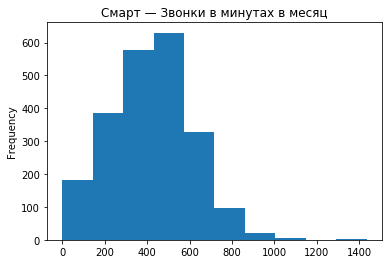

In [28]:
# Смарт звонки
df[df['tariff'] == 'smart']['month_calls_duration'].plot(kind='hist', bins=10)
plt.title('Смарт — Звонки в минутах в месяц')

Text(0.5, 1.0, 'Ультра — Звонки в минутах в месяц')

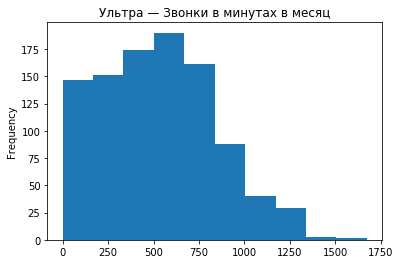

In [29]:
# Ультра звонки
df[df['tariff'] == 'ultra']['month_calls_duration'].plot(kind='hist', bins=10)
plt.title('Ультра — Звонки в минутах в месяц')

In [30]:
# ыводим среднюю,дисперсию и стд. ЗВОНКИ
df.groupby('tariff')\
  .agg({'month_calls_duration':['median','mean','var','std']})\
  .style.format("{:.2f}")

На Смарте люди в месяц говорят около 450 минут, на Ультре 550 минут в месяц. То есть на Смарте люди подходят к краю своего тарифа, а на Ультре у них остается запас 2500 минут. Среднее и медиана лежат рядом и там и там — ничего экстремального, видимо

In [31]:
# выводим среднюю,дисперсию и стд. СМС
df.groupby('tariff')\
  .agg({'mb_total_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

---

Text(0.5, 1.0, 'Смарт — Интернет в МБ в месяц')

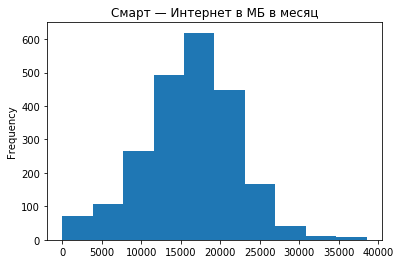

In [32]:
# Смарт интернет
df[df['tariff'] == 'smart']['mb_total_in_month'].plot(kind='hist', bins=10)
plt.title('Смарт — Интернет в МБ в месяц')

Text(0.5, 1.0, 'Ультра — Интернет в МБ в месяц')

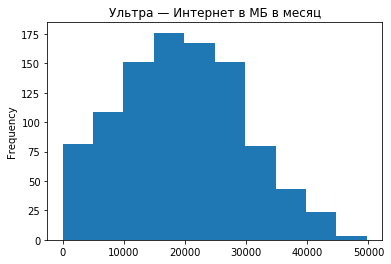

In [33]:
# Ультра интернет
df[df['tariff'] == 'ultra']['mb_total_in_month'].plot(kind='hist', bins=10)
plt.title('Ультра — Интернет в МБ в месяц')

In [34]:
# выводим среднюю,дисперсию и стд. ИНТЕРНЕТ
df.groupby('tariff')\
  .agg({'sms_total_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

---

Text(0.5, 1.0, 'Смарт — СМС в месяц')

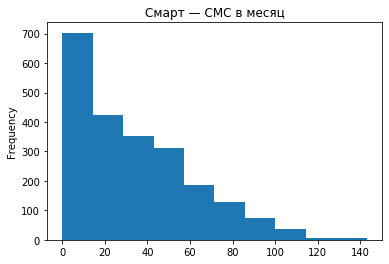

In [35]:
df[df['tariff'] == 'smart']['sms_total_in_month'].plot(kind='hist', bins=10)
plt.title('Смарт — СМС в месяц')

Text(0.5, 1.0, 'Ультра — СМС в месяц')

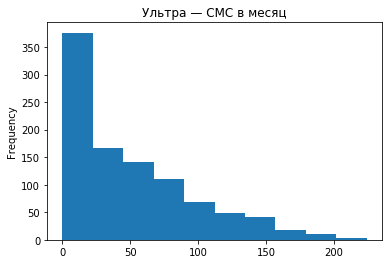

In [36]:
df[df['tariff'] == 'ultra']['sms_total_in_month'].plot(kind='hist', bins=10)
plt.title('Ультра — СМС в месяц')

---

**Вывод:**

Пользователи smart тарифа используют чуть меньшее количество минут звонков и сообщений в месяц, чем пользователи ultra. Лимита на звонки и минуты в ultra в среднем не достигает никто. При этом интернетом пользователи ultra пользуются гораздо активнее. Скорее всего, пользователи ultra выбирают этот тариф из-за большего интернет-трафика.**

## Шаг 4. Проверим гипотезы

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна

H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна

In [37]:
ultra = df[df['tariff'] == 'ultra']
smart = df[df['tariff'] == 'smart']

In [38]:
ultra = ultra['total_paid']
smart = smart['total_paid']
smart

8       1150.0
9        550.0
10       550.0
11      1150.0
12      1550.0
         ...  
3208     550.0
3209     950.0
3210    1550.0
3211    1150.0
3212     950.0
Name: total_paid, Length: 2229, dtype: float64

In [39]:
alpha = 0.05
results = st.ttest_ind(ultra, smart)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


**ОТВЕРГНУТА**

---

2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Сформулируем нулевую и альтернативную гипотезы:

H₀ - средняя выручка пользователей из Москвы и остальных регионов равна

H₁ - средняя выручка пользователей из Москвы и остальных регионов не равна

In [40]:
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Провинция')

In [41]:
moscow = df[df['region'] == 'Москва']
province = df[df['region'] == 'Провинция']

In [42]:
moscow = moscow['total_paid']
province = province['total_paid']

In [43]:
results = st.ttest_ind(moscow, province)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


**Вторую гипотезу отвергнуть не удалось - выручка с пользователей-москвичей и пользователей из других регионов почти равнозначна.**

## Шаг 5. Общий вывод

**В ходе работы:**

1.Объединили датасеты в один.

2.Привели данные к нужным типам, нашли и исправили ошибки. Создали датасеты со средней выручкой в месяц в зависимости от тарифа.

3.Выяснили, что пользователи smart тарифа используют чуть меньшее количество минут звонков и сообщений в месяц, чем пользователи ultra. Лимита на звонки и минуты в ultra в среднем не достигает никто. При этом интернетом пользователи ultra пользуются гораздо активнее. Скорее всего, пользователи ultra выбирают этот тариф из-за большего интернет-трафика.

**Проверили 2 гипотезы:**

Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна - **отвергли**
Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов - **не отвергли**

**Тариф ultra приносит компании бОльшую выручку. Стоит сфокусироваться на его продвижении повсеместно - в Москве и других регионах.**
